In [1]:
from google.colab import files
uploaded = files.upload()

Saving ObesityDataSet.csv to ObesityDataSet.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
import re
import tensorflow as tf
warnings.filterwarnings('ignore')
from matplotlib import style
%matplotlib inline

In [3]:
df=pd.read_csv('ObesityDataSet.csv')
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [5]:
float_columns = ["Height"]

for column in float_columns:
    # Kalikan nilai dengan 100 untuk menggeser desimal
    df[column] = (df[column] * 100).astype(int)



In [6]:
int_columns = ["Weight","Age","FCVC","NCP","CH2O","FAF","TUE"]

for column in int_columns:
    df[column] = df[column].astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2111 non-null   int64 
 1   Gender                          2111 non-null   object
 2   Height                          2111 non-null   int64 
 3   Weight                          2111 non-null   int64 
 4   CALC                            2111 non-null   object
 5   FAVC                            2111 non-null   object
 6   FCVC                            2111 non-null   int64 
 7   NCP                             2111 non-null   int64 
 8   SCC                             2111 non-null   object
 9   SMOKE                           2111 non-null   object
 10  CH2O                            2111 non-null   int64 
 11  family_history_with_overweight  2111 non-null   object
 12  FAF                             2111 non-null   

In [8]:
df.isna().sum()

,0
Age,0
Gender,0
Height,0
Weight,0
CALC,0
FAVC,0
FCVC,0
NCP,0
SCC,0
SMOKE,0


In [9]:
print("Jumlah duplikasi: ", df.duplicated().sum())
df.describe()

Jumlah duplikasi:  307


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,23.972525,169.802937,86.234960,2.213169,2.523449,1.712459,0.734723,0.381336
std,6.308664,9.300513,26.084709,0.599397,0.830288,0.598760,0.832812,0.582536
min,14.000000,145.000000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.000000,163.000000,65.000000,2.000000,2.000000,1.000000,0.000000,0.000000
50%,22.000000,170.000000,83.000000,2.000000,3.000000,2.000000,1.000000,0.000000
75%,26.000000,176.000000,107.000000,3.000000,3.000000,2.000000,1.000000,1.000000
max,61.000000,198.000000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Cleaning data

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
print("Jumlah duplikasi: ", df.duplicated().sum())
df.describe()

Jumlah duplikasi:  0


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000
mean,24.028825,169.916851,84.434035,2.184590,2.512749,1.700665,0.766075,0.410200
std,6.572287,9.488222,25.754969,0.577606,0.836198,0.602435,0.850201,0.595999
min,14.000000,145.000000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.000000,163.000000,64.000000,2.000000,2.000000,1.000000,0.000000,0.000000
50%,22.000000,170.000000,82.000000,2.000000,3.000000,2.000000,1.000000,0.000000
75%,26.000000,177.000000,104.000000,3.000000,3.000000,2.000000,1.000000,1.000000
max,61.000000,198.000000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [12]:
df['Height'] = df['Height'].astype(float)

print(df.dtypes)

Age                                 int64
Gender                             object
Height                            float64
Weight                              int64
CALC                               object
FAVC                               object
FCVC                                int64
NCP                                 int64
SCC                                object
SMOKE                              object
CH2O                                int64
family_history_with_overweight     object
FAF                                 int64
TUE                                 int64
CAEC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


EDA (Exploratory Data Analysis)

In [13]:
df.describe(include="all")

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,1804.000000,1804,1804.000000,1804.000000,1804,1804,1804.000000,1804.000000,1804,1804,1804.000000,1804,1804.000000,1804.000000,1804,1804,1804
unique,NaN,2,NaN,NaN,4,2,NaN,NaN,2,2,NaN,2,NaN,NaN,4,5,7
top,NaN,Male,NaN,NaN,Sometimes,yes,NaN,NaN,no,no,NaN,yes,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_I
freq,NaN,942,NaN,NaN,1143,1566,NaN,NaN,1711,1761,NaN,1457,NaN,NaN,1496,1313,321
mean,24.028825,NaN,169.916851,84.434035,NaN,NaN,2.184590,2.512749,NaN,NaN,1.700665,NaN,0.766075,0.410200,NaN,NaN,NaN
std,6.572287,NaN,9.488222,25.754969,NaN,NaN,0.577606,0.836198,NaN,NaN,0.602435,NaN,0.850201,0.595999,NaN,NaN,NaN
min,14.000000,NaN,145.000000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,19.000000,NaN,163.000000,64.000000,NaN,NaN,2.000000,2.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
50%,22.000000,NaN,170.000000,82.000000,NaN,NaN,2.000000,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.000000,NaN,NaN,NaN
75%,26.000000,NaN,177.000000,104.000000,NaN,NaN,3.000000,3.000000,NaN,NaN,2.000000,NaN,1.000000,1.000000,NaN,NaN,NaN


In [14]:
for column in df:
  print(sorted(df[column].unique()),"\n")

[14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 50, 51, 52, 55, 56, 61] 

['Female', 'Male'] 

[145.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 186.0, 187.0, 188.0, 189.0, 190.0, 191.0, 192.0, 193.0, 194.0, 197.0, 198.0] 

[39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 140, 141, 142, 144, 147

In [15]:
df.nunique()

,0
Age,40
Gender,2
Height,50
Weight,115
CALC,4
FAVC,2
FCVC,3
NCP,4
SCC,2
SMOKE,2


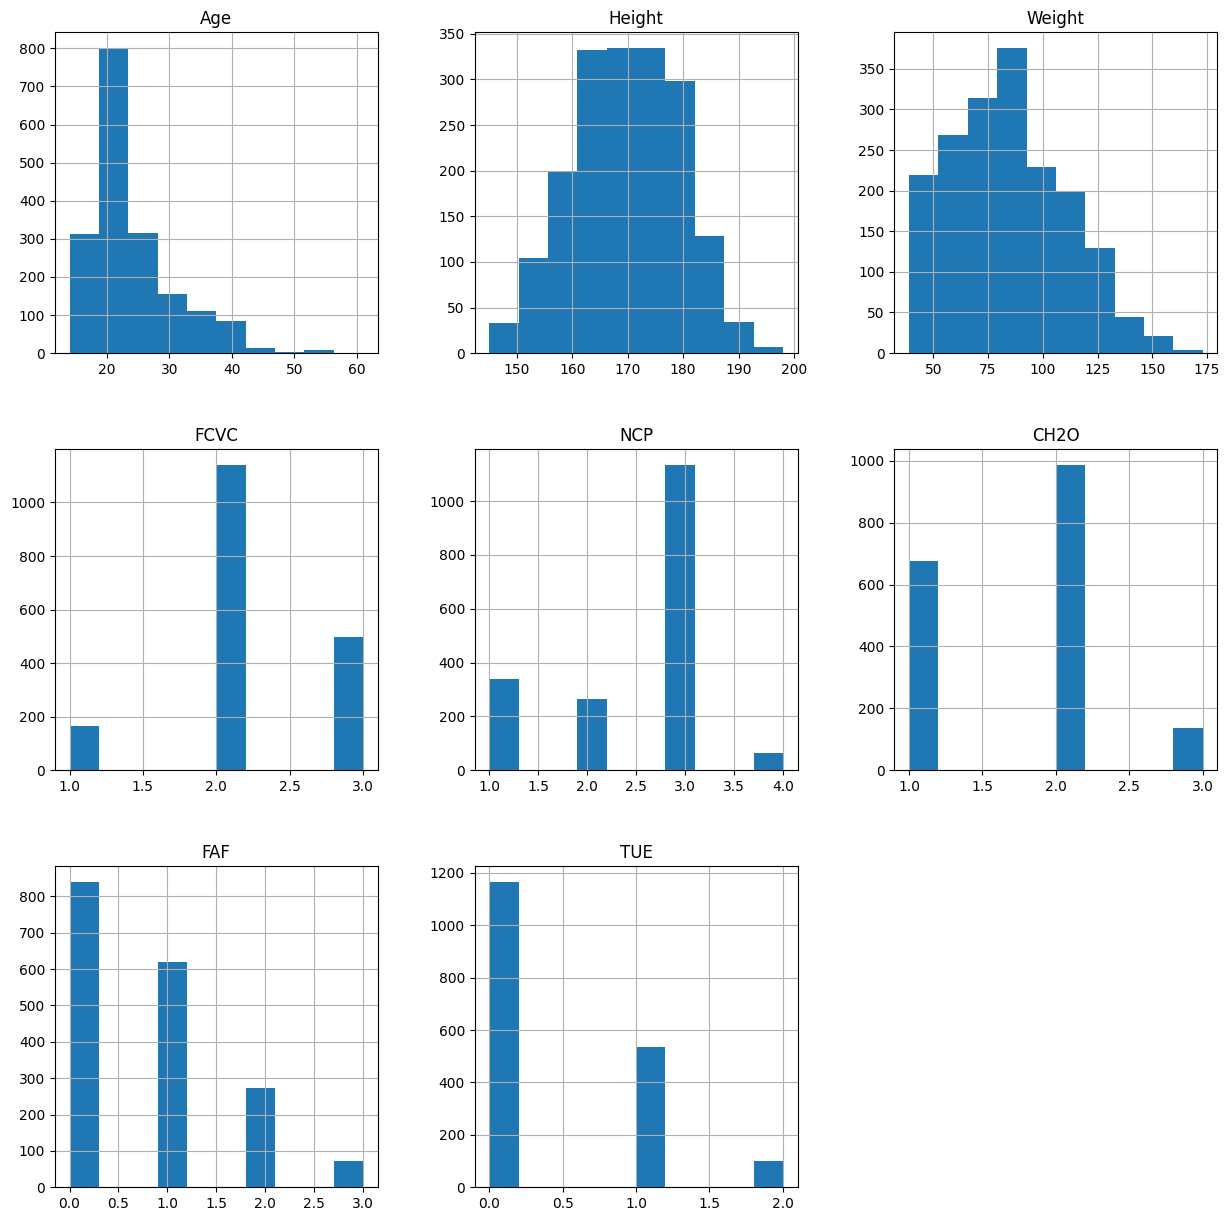

In [16]:
df.hist(figsize=(15,15))
plt.show()

In [17]:
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,162.0,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,152.0,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,180.0,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,180.0,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,178.0,89,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,25,Female,162.0,107,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_III
2102,25,Female,162.0,108,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_III
2103,21,Female,172.0,133,Sometimes,yes,3,3,no,no,1,yes,1,0,Sometimes,Public_Transportation,Obesity_Type_III
2104,21,Female,173.0,133,Sometimes,yes,3,3,no,no,1,yes,1,0,Sometimes,Public_Transportation,Obesity_Type_III


In [18]:
# Mengonversi tinggi dari cm ke meter
df['height_in_m'] = df['Height'] / 100

# Menambahkan kolom BMI
df['BMI'] = df['Weight'] / (df['height_in_m'] ** 2)

In [19]:
df['BMI'] = df['BMI'].round(1)
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad,height_in_m,BMI
0,21,Female,162.0,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight,1.62,24.4
1,21,Female,152.0,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight,1.52,24.2
2,23,Male,180.0,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight,1.80,23.8
3,27,Male,180.0,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I,1.80,26.9
4,22,Male,178.0,89,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II,1.78,28.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,25,Female,162.0,107,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_III,1.62,40.8
2102,25,Female,162.0,108,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_III,1.62,41.2
2103,21,Female,172.0,133,Sometimes,yes,3,3,no,no,1,yes,1,0,Sometimes,Public_Transportation,Obesity_Type_III,1.72,45.0
2104,21,Female,173.0,133,Sometimes,yes,3,3,no,no,1,yes,1,0,Sometimes,Public_Transportation,Obesity_Type_III,1.73,44.4


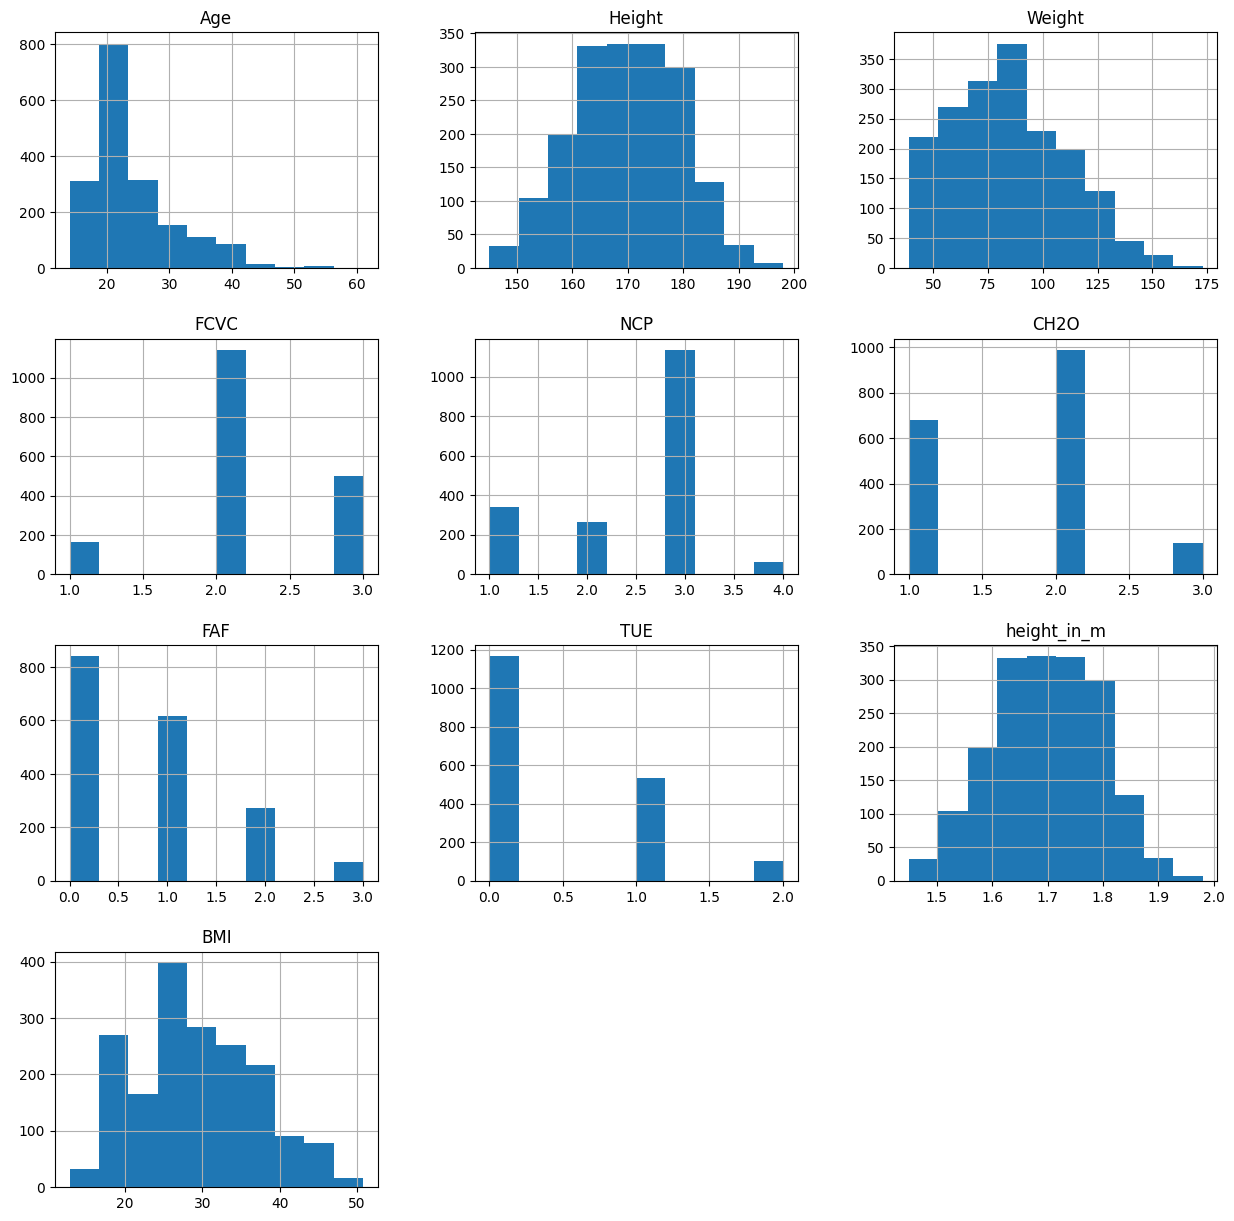

In [20]:
df.hist(figsize=(15,15))
plt.show()

In [21]:
bmi_range = df.groupby('NObeyesdad')['BMI'].agg(['min', 'max']).reset_index()
bmi_range

,NObeyesdad,min,max
0,Insufficient_Weight,12.8,18.9
1,Normal_Weight,18.5,24.9
2,Obesity_Type_I,29.8,35.3
3,Obesity_Type_II,34.2,40.1
4,Obesity_Type_III,36.8,50.8
5,Overweight_Level_I,22.5,28.7
6,Overweight_Level_II,25.8,30.4


In [ ]:
df.drop(columns=['height_in_m'], inplace=True)

In [22]:
df.drop(columns=['BMI'], inplace=True)

In [23]:
selected_columns = ['Gender', 'family_history_with_overweight',	'FAVC',	'FCVC',	'NCP',	'CAEC',	'SMOKE',	'CH2O',	'SCC', 'FAF',	'TUE', 'CALC',	'MTRANS',	'NObeyesdad']

for column in selected_columns:
    print(f"Unique value frequencies for column '{column}':")
    print(df[column].value_counts())
    print("-" * 40)

Unique value frequencies for column 'Gender':
Gender
Male      942
Female    862
Name: count, dtype: int64
----------------------------------------
Unique value frequencies for column 'family_history_with_overweight':
family_history_with_overweight
yes    1457
no      347
Name: count, dtype: int64
----------------------------------------
Unique value frequencies for column 'FAVC':
FAVC
yes    1566
no      238
Name: count, dtype: int64
----------------------------------------
Unique value frequencies for column 'FCVC':
FCVC
2    1141
3     498
1     165
Name: count, dtype: int64
----------------------------------------
Unique value frequencies for column 'NCP':
NCP
3    1135
1     340
2     264
4      65
Name: count, dtype: int64
----------------------------------------
Unique value frequencies for column 'CAEC':
CAEC
Sometimes     1496
Frequently     223
Always          53
no              32
Name: count, dtype: int64
----------------------------------------
Unique value frequencies for

Frequency of Consuming Vegetables (FCVC)
1.   Rarely (165)
2.   Sometimes (1141)
3.   Always (498)

Number of Main Meals Daily (NCP)
1.   Satu kali sehari (340)
2.   Dua kali sehari (264)
3.   Tiga kali sehari (1135)
4.   Lebih dari tiga kali (65)

Liquid Intake Daily (CH20)
1.   Kurang dari satu liter (678)
2.   Kisaran antara 1-2 liter (988)
3.   Lebih dari 2 liter (138)

Physical Exercise (FAF)
0.   Tidak ada aktivitas fisik (840)
1.   Kisaran 1-2 hari (618)
2.   Kisaran 3-4 hari (274)
3.   Kisaran 5-6 hari atau lebih (72)

Schedule Dedicated to Technology (TUE)
0.   Kisaran 0-2 jam (1166)
1.   Kisaran antara 3-5 jam (536)
2.   Lebih dari 5 jam (102)



Translate Kata  

In [24]:
df['Gender'].value_counts()

,count
Gender,
Male,942
Female,862


In [25]:
translation_gender = {
    "Male": "pria",
    "Female": "perempuan"
}

def translate_gender(gender_string):
    for english, indonesian in translation_gender.items():
        gender_string = gender_string.replace(english, indonesian)
    return gender_string

# Terapkan fungsi ke kolom
df['Gender'] = df['Gender'].apply(translate_gender)
df['Gender'].value_counts()

,count
Gender,
pria,942
perempuan,862


In [26]:
df['family_history_with_overweight'].value_counts()

,count
family_history_with_overweight,
yes,1457
no,347


In [27]:
translation_family_history_with_overweight= {
    "yes": "iya",
    "no": "tidak"
}

def translate_family_history_with_overweight(family_history_with_overweight_string):
    for english, indonesian in translation_family_history_with_overweight.items():
        family_history_with_overweight_string = family_history_with_overweight_string.replace(english, indonesian)
    return family_history_with_overweight_string

# Terapkan fungsi ke kolom
df['family_history_with_overweight'] = df['family_history_with_overweight'].apply(translate_family_history_with_overweight)
df['family_history_with_overweight'].value_counts()

,count
family_history_with_overweight,
iya,1457
tidak,347


In [28]:
df['FAVC'].value_counts()

,count
FAVC,
yes,1566
no,238


In [29]:
translation_FAVC= {
    "yes": "iya",
    "no": "tidak"
}

def translate_FAVC(FAVC_string):
    for english, indonesian in translation_FAVC.items():
        FAVC_string = FAVC_string.replace(english, indonesian)
    return FAVC_string

# Terapkan fungsi ke kolom
df['FAVC'] = df['FAVC'].apply(translate_FAVC)
df['FAVC'].value_counts()

,count
FAVC,
iya,1566
tidak,238


In [30]:
df['SCC'].value_counts()

,count
SCC,
no,1711
yes,93


In [31]:
translation_SCC= {
    "yes": "iya",
    "no": "tidak"
}

def translate_SCC(SCC_string):
    for english, indonesian in translation_SCC.items():
        SCC_string = SCC_string.replace(english, indonesian)
    return SCC_string

# Terapkan fungsi ke kolom
df['SCC'] = df['SCC'].apply(translate_SCC)
df['SCC'].value_counts()

,count
SCC,
tidak,1711
iya,93


In [32]:
df['SMOKE'].value_counts()

,count
SMOKE,
no,1761
yes,43


In [33]:
translation_SMOKE= {
    "yes": "iya",
    "no": "tidak"
}

def translate_SMOKE(SMOKE_string):
    for english, indonesian in translation_SMOKE.items():
        SMOKE_string = SMOKE_string.replace(english, indonesian)
    return SMOKE_string

# Terapkan fungsi ke kolom
df['SMOKE'] = df['SMOKE'].apply(translate_SMOKE)
df['SMOKE'].value_counts()

,count
SMOKE,
tidak,1761
iya,43


In [34]:
df['CALC'].value_counts()

,count
CALC,
Sometimes,1143
no,591
Frequently,69
Always,1


In [35]:
translation_CALC= {
    "Sometimes": "kadang-kadang",
    "no": "tidak",
    "Frequently": "sering",
    "Always": "selalu"
}

def translate_CALC(CALC_string):
    for english, indonesian in translation_CALC.items():
        CALC_string = CALC_string.replace(english, indonesian)
    return CALC_string

# Terapkan fungsi ke kolom
df['CALC'] = df['CALC'].apply(translate_CALC)
df['CALC'].value_counts()

,count
CALC,
kadang-kadang,1143
tidak,591
sering,69
selalu,1


In [36]:
df['CAEC'].value_counts()

,count
CAEC,
Sometimes,1496
Frequently,223
Always,53
no,32


In [37]:
translation_CAEC= {
    "Sometimes": "kadang-kadang",
    "no": "tidak",
    "Frequently": "sering",
    "Always": "selalu"
}

def translate_CAEC(CAEC_string):
    for english, indonesian in translation_CAEC.items():
        CAEC_string = CAEC_string.replace(english, indonesian)
    return CAEC_string

# Terapkan fungsi ke kolom
df['CAEC'] = df['CAEC'].apply(translate_CAEC)
df['CAEC'].value_counts()

,count
CAEC,
kadang-kadang,1496
sering,223
selalu,53
tidak,32


In [38]:
df['MTRANS'].value_counts()

,count
MTRANS,
Public_Transportation,1313
Automobile,418
Walking,55
Motorbike,11
Bike,7


In [39]:
translation_MTRANS= {
    "Public_Transportation": "transportasi umum",
    "Automobile": "mobil",
    "Walking": "jalan kaki",
    "Motorbike": "sepeda motor",
    "Bike": "sepeda"
}

def translate_MTRANS(MTRANS_string):
    for english, indonesian in translation_MTRANS.items():
        MTRANS_string = MTRANS_string.replace(english, indonesian)
    return MTRANS_string

# Terapkan fungsi ke kolom
df['MTRANS'] = df['MTRANS'].apply(translate_MTRANS)
df['MTRANS'].value_counts()

,count
MTRANS,
transportasi umum,1313
mobil,418
jalan kaki,55
sepeda motor,11
sepeda,7


In [40]:
df['FCVC'].value_counts()

,count
FCVC,
2,1141
3,498
1,165


In [41]:
replace_FCVC = {
    "1": "jarang",
    "2": "kadang-kadang",
    "3": "selalu"
}

# Membuat fungsi untuk mengubah angka menjadi penjelasan
def replacing_FCVC(FCVC_value):
    # Pastikan nilai diubah menjadi string terlebih dahulu
    FCVC_value_str = str(FCVC_value)
    return replace_FCVC.get(FCVC_value_str, FCVC_value_str)

# Terapkan fungsi ke kolom
df['FCVC'] = df['FCVC'].apply(replacing_FCVC)
print(df['FCVC'].value_counts())

FCVC
kadang-kadang    1141
selalu            498
jarang            165
Name: count, dtype: int64


In [42]:
df['NCP'].value_counts()

,count
NCP,
3,1135
1,340
2,264
4,65


In [43]:
replace_NCP = {
    "1": "sekali",
    "2": "dua kali",
    "3": "tiga kali",
    "4": "lebih dari tiga kali"
}

# Membuat fungsi untuk mengubah angka menjadi penjelasan
def replacing_NCP(NCP_value):
    # Pastikan nilai diubah menjadi string terlebih dahulu
    NCP_value_str = str(NCP_value)
    return replace_NCP.get(NCP_value_str, NCP_value_str)

# Terapkan fungsi ke kolom
df['NCP'] = df['NCP'].apply(replacing_NCP)
print(df['NCP'].value_counts())

NCP
tiga kali               1135
sekali                   340
dua kali                 264
lebih dari tiga kali      65
Name: count, dtype: int64


In [44]:
df['CH2O'].value_counts()

,count
CH2O,
2,988
1,678
3,138


In [45]:
replace_CH2O = {
    "1": "kurang dari 1 liter",
    "2": "kisaran antara 1-2 liter",
    "3": "lebih dari 2 liter"
}

# Membuat fungsi untuk mengubah angka menjadi penjelasan
def replacing_CH2O(CH2O_value):
    # Pastikan nilai diubah menjadi string terlebih dahulu
    CH2O_value_str = str(CH2O_value)
    return replace_CH2O.get(CH2O_value_str, CH2O_value_str)

# Terapkan fungsi ke kolom
df['CH2O'] = df['CH2O'].apply(replacing_CH2O)
print(df['CH2O'].value_counts())

CH2O
kisaran antara 1-2 liter    988
kurang dari 1 liter         678
lebih dari 2 liter          138
Name: count, dtype: int64


In [46]:
df['TUE'].value_counts()

,count
TUE,
0,1166
1,536
2,102


In [47]:
replace_TUE = {
    "0": "kisaran 0-2 jam",
    "1": "kisaran antara 3-5 jam",
    "2": "lebih dari 5 jam"
}

# Membuat fungsi untuk mengubah angka menjadi penjelasan
def replacing_TUE(TUE_value):
    # Pastikan nilai diubah menjadi string terlebih dahulu
    TUE_value_str = str(TUE_value)
    return replace_TUE.get(TUE_value_str, TUE_value_str)

# Terapkan fungsi ke kolom
df['TUE'] = df['TUE'].apply(replacing_TUE)
print(df['TUE'].value_counts())

TUE
kisaran 0-2 jam           1166
kisaran antara 3-5 jam     536
lebih dari 5 jam           102
Name: count, dtype: int64


In [48]:
df['FAF'].value_counts()

,count
FAF,
0,840
1,618
2,274
3,72


In [49]:
replace_FAF = {
    "0": "tidak ada aktivitas fisik",
    "1": "kisaran 1-2 hari",
    "2": "kisaran 3-4 hari",
    "3": "kisaran 5-6 hari atau lebih"
}

# Membuat fungsi untuk mengubah angka menjadi penjelasan
def replacing_FAF(FAF_value):
    # Pastikan nilai diubah menjadi string terlebih dahulu
    FAF_value_str = str(FAF_value)
    return replace_FAF.get(FAF_value_str, FAF_value_str)

# Terapkan fungsi ke kolom
df['FAF'] = df['FAF'].apply(replacing_FAF)
print(df['FAF'].value_counts())

FAF
tidak ada aktivitas fisik      840
kisaran 1-2 hari               618
kisaran 3-4 hari               274
kisaran 5-6 hari atau lebih     72
Name: count, dtype: int64


In [50]:
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad,height_in_m
0,21,perempuan,162.0,64,tidak,tidak,kadang-kadang,tiga kali,tidak,tidak,kisaran antara 1-2 liter,iya,tidak ada aktivitas fisik,kisaran antara 3-5 jam,kadang-kadang,transportasi umum,Normal_Weight,1.62
1,21,perempuan,152.0,56,kadang-kadang,tidak,selalu,tiga kali,iya,iya,lebih dari 2 liter,iya,kisaran 5-6 hari atau lebih,kisaran 0-2 jam,kadang-kadang,transportasi umum,Normal_Weight,1.52
2,23,pria,180.0,77,sering,tidak,kadang-kadang,tiga kali,tidak,tidak,kisaran antara 1-2 liter,iya,kisaran 3-4 hari,kisaran antara 3-5 jam,kadang-kadang,transportasi umum,Normal_Weight,1.80
3,27,pria,180.0,87,sering,tidak,selalu,tiga kali,tidak,tidak,kisaran antara 1-2 liter,tidak,kisaran 3-4 hari,kisaran 0-2 jam,kadang-kadang,jalan kaki,Overweight_Level_I,1.80
4,22,pria,178.0,89,kadang-kadang,tidak,kadang-kadang,sekali,tidak,tidak,kisaran antara 1-2 liter,tidak,tidak ada aktivitas fisik,kisaran 0-2 jam,kadang-kadang,transportasi umum,Overweight_Level_II,1.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,25,perempuan,162.0,107,kadang-kadang,iya,selalu,tiga kali,tidak,tidak,kisaran antara 1-2 liter,iya,tidak ada aktivitas fisik,kisaran 0-2 jam,kadang-kadang,transportasi umum,Obesity_Type_III,1.62
2102,25,perempuan,162.0,108,kadang-kadang,iya,selalu,tiga kali,tidak,tidak,kisaran antara 1-2 liter,iya,tidak ada aktivitas fisik,kisaran 0-2 jam,kadang-kadang,transportasi umum,Obesity_Type_III,1.62
2103,21,perempuan,172.0,133,kadang-kadang,iya,selalu,tiga kali,tidak,tidak,kurang dari 1 liter,iya,kisaran 1-2 hari,kisaran 0-2 jam,kadang-kadang,transportasi umum,Obesity_Type_III,1.72
2104,21,perempuan,173.0,133,kadang-kadang,iya,selalu,tiga kali,tidak,tidak,kurang dari 1 liter,iya,kisaran 1-2 hari,kisaran 0-2 jam,kadang-kadang,transportasi umum,Obesity_Type_III,1.73


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1804 entries, 0 to 2106
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             1804 non-null   int64  
 1   Gender                          1804 non-null   object 
 2   Height                          1804 non-null   float64
 3   Weight                          1804 non-null   int64  
 4   CALC                            1804 non-null   object 
 5   FAVC                            1804 non-null   object 
 6   FCVC                            1804 non-null   object 
 7   NCP                             1804 non-null   object 
 8   SCC                             1804 non-null   object 
 9   SMOKE                           1804 non-null   object 
 10  CH2O                            1804 non-null   object 
 11  family_history_with_overweight  1804 non-null   object 
 12  FAF                             1804 no

In [52]:
float_columns = ["Height"]
int_columns = ["Weight"]

for column in float_columns:
    df[column] = df[column].fillna(0).astype(int)

for column in int_columns:
    df[column] = df[column].astype(float)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1804 entries, 0 to 2106
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             1804 non-null   int64  
 1   Gender                          1804 non-null   object 
 2   Height                          1804 non-null   int64  
 3   Weight                          1804 non-null   float64
 4   CALC                            1804 non-null   object 
 5   FAVC                            1804 non-null   object 
 6   FCVC                            1804 non-null   object 
 7   NCP                             1804 non-null   object 
 8   SCC                             1804 non-null   object 
 9   SMOKE                           1804 non-null   object 
 10  CH2O                            1804 non-null   object 
 11  family_history_with_overweight  1804 non-null   object 
 12  FAF                             1804 no

In [54]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad,height_in_m
0,21,perempuan,162,64.0,tidak,tidak,kadang-kadang,tiga kali,tidak,tidak,kisaran antara 1-2 liter,iya,tidak ada aktivitas fisik,kisaran antara 3-5 jam,kadang-kadang,transportasi umum,Normal_Weight,1.62
1,21,perempuan,152,56.0,kadang-kadang,tidak,selalu,tiga kali,iya,iya,lebih dari 2 liter,iya,kisaran 5-6 hari atau lebih,kisaran 0-2 jam,kadang-kadang,transportasi umum,Normal_Weight,1.52
2,23,pria,180,77.0,sering,tidak,kadang-kadang,tiga kali,tidak,tidak,kisaran antara 1-2 liter,iya,kisaran 3-4 hari,kisaran antara 3-5 jam,kadang-kadang,transportasi umum,Normal_Weight,1.80
3,27,pria,180,87.0,sering,tidak,selalu,tiga kali,tidak,tidak,kisaran antara 1-2 liter,tidak,kisaran 3-4 hari,kisaran 0-2 jam,kadang-kadang,jalan kaki,Overweight_Level_I,1.80
4,22,pria,178,89.0,kadang-kadang,tidak,kadang-kadang,sekali,tidak,tidak,kisaran antara 1-2 liter,tidak,tidak ada aktivitas fisik,kisaran 0-2 jam,kadang-kadang,transportasi umum,Overweight_Level_II,1.78


In [55]:
output_file = 'Data_Obesitas_new.csv'
df.to_csv(output_file, index=False)